In [297]:
import numpy as np
from numpy import nan
import pandas as pd
import matplotlib.pyplot as plt
import random
from collections import Counter

In [298]:
def linear_reg_prediction(X,W):
    return np.dot(X,W)

def linear_reg_grad(X,error):
    return np.dot(X.T,error)

def ridge_batch_grad(X,error,lamb,W):
    return np.dot(X.T,error) + 2*lamb*W

def lasso_batch_grad(X,error,lamb,W):
    one = []
    for i in range(len(W)):
        if(W[i]<0):
            one.append(-1)
        else:
            one.append(1)
    return np.dot(X.T,error) + lamb*one

def batch(X,W,Y,iterations):
    alpha = 3*1e-10
    for i in range(iterations):
        error = linear_reg_prediction(X,W) - Y
        sse = 0.5*np.sum(error**2)
        E.append(sse)
        w.append(W)
        W = W - alpha*linear_reg_grad(X,error)
    
    plt.plot(E,'r--')
    plt.show()
    
    
def stochastic(X,W,Y):
    alpha = 5*1e-8
    for i in range(len(X)):
        x = X[i].reshape(1,-1)
        y = Y[i]
        error = linear_reg_prediction(x,W) - y
        sse = 0.5*np.sum(error**2).reshape(1,1)
        E.extend(sse)
        w.append(W)
        W = W - alpha*linear_reg_grad(x,error)
    
    plt.plot(E,'r--')
    plt.show()

def mini(X,W,Y):
    m = 10
    alpha = 5*1e-8
    for i in range(int(len(X)/m)):
        x = X[i*m:(i+1)*m].reshape(m,3)
        y = Y[i*m:(i+1)*m].reshape(m,1)
        error = linear_reg_prediction(x,W) - y
        sse = 0.5*np.sum(error**2)
        E.append(sse)
        w.append(W)
        W = W - alpha*linear_reg_grad(x,error)
    
    plt.plot(E,'r--')
    plt.show()

def ridge_batch(X,W,Y,lamb):
    alpha = 3*1e-10
    for i in range(iterations):
        error = linear_reg_prediction(X,W) - Y
        sse = 0.5*np.sum(error**2) + lamb*np.sum(W**2)
        E.append(sse)
        w.append(W)
        W = W - alpha*ridge_batch_grad(X,error,lamb,W)
    
    plt.plot(E,'r--')
    plt.show()
    
def vectorized(X,W,Y):
    W = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),Y)
    error = linear_reg_prediction(X,W) - Y
    sse = 0.5*np.sum(error**2)
    print(W)
    print(sse)
    
def lasso_batch(X,W,Y,lamb):
    alpha = 3*1e-10
    for i in range(iterations):
        error = linear_reg_prediction(X,W) - Y
        sse = 0.5*np.sum(error**2) + lamb*np.sum(np.abs(W))
        E.append(sse)
        w.append(W)
        W = W - alpha*ridge_batch_grad(X,error,lamb,W)
    
    plt.plot(E,'r--')
    plt.show()

In [299]:
A = pd.read_excel(r'C:\Users\Akhil Agnihotri\Desktop\NNFL\data.xlsx',header=None)
iterations = 50
N = np.shape((A[0]))[0]
X_orig = A.iloc[:,0:2]
one = np.ones(N).reshape((N,1))
X = np.hstack((one,X_orig))
Y = A.iloc[:,2:].values
W = -1+2*np.random.random((3,1))
E = []
w = []

# batch(X,W,Y,iterations)    # 1
# stochastic(X,W,Y)          # 2
# mini(X,W,Y)    
# lamb = 0.5                 # 3
# ridge_batch(X,W,Y,lamb)   
# vectorized(X,W,Y)          # 4
# lamb = 0.5                 # 5
# lasso_batch(X,W,Y,lamb)   

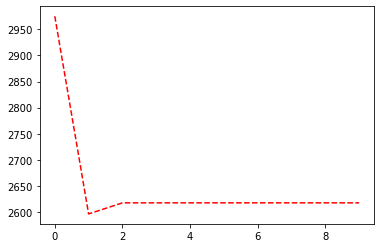

Best centers :  [array([6.30103093, 2.88659794, 4.95876289, 1.69587629]), array([5.00566038, 3.36037736, 1.56226415, 0.28867925])]


In [300]:
B = pd.read_excel(r'C:\Users\Akhil Agnihotri\Desktop\NNFL\data2.xlsx',header=None).values    #  6
C1 = random.choice(B)
C2 = random.choice(B)
center = [C1,C2]
iterations = 10
centroid = []
E = []

for i in range(iterations):
    C = {}
    for k in range(2):
        C.setdefault(k, [])
    distance = []
    for point in B:
        dist = []
        for c in center:
            dist.append(np.linalg.norm(point-c))
            distance.append(np.linalg.norm(point-c))
        c_number = np.asarray(dist).argmin()
        C[c_number].append(point)
    for i in range(len(center)):
        center[i] = np.mean(C[i],axis=0)
    E.append(np.sum(np.asarray(distance)**2))
    centroid.append(center)
plt.plot(E,'r--')
plt.show()
print("Best centers : ",centroid[np.asarray(E).argmin()])

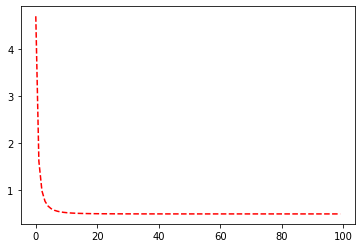

Accuracy =  0.4
Selectivity =  1.0
Specificity =  0.04


In [376]:
def logistic_pred(X,W):                                                  #   7
    return 1/(1+np.exp(-np.dot(X,W)))

def logistic_grad(X,error):
    return np.dot(X.T,error)

def confusion_matrix(X_test,W,Y_pred,Y_test,classifier):
    if(classifier=='logistic'):
        Y_pred = logistic_pred(X_test,W)
    else:
        Y_pred = Y_pred
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in range(len(Y_pred)):
        if(classifier=='logistic'):
            if(Y_pred[i]>=0.5):
                Y_pred[i] = 2
            else:
                Y_pred[i] = 1
        
        if(Y_pred[i]==int(Y_test[i]) and Y_pred[i]==1):
            tn = tn + 1
        elif(Y_pred[i]==int(Y_test[i]) and Y_pred[i]==2):
            tp = tp + 1
        elif(Y_pred[i]!=int(Y_test[i]) and Y_pred[i]==1):
            fn = fn + 1
        else:
            fp = fp + 1

    acc = (tp+tn)/len(Y_pred)
    se = tp/(tp+fn)
    sp = tn/(tn+fp)
    print('Accuracy = ',acc)
    print('Selectivity = ',se)
    print('Specificity = ',sp)

def logistic_batch(X,W,Y,iterations,alpha):
    for i in range(iterations):
        error = logistic_pred(X,W) - Y
        sse = 0.5*np.sum(error**2)
        E.append(sse)
        w.append(W)
        W = W - alpha*logistic_grad(X,error)
    plt.plot(E,'r--')
    plt.show()

C = pd.read_excel(r'C:\Users\Akhil Agnihotri\Desktop\NNFL\data3.xlsx',header=None).values  
random.shuffle(C)
C_train = C[:int(0.6*len(C))]
C_test = C[int(-0.4*len(C)):]
X_train,Y_train = C_train[:,:4],C_train[:,-1].reshape(-1,1)
X_test,Y_test = C_test[:,:4],C_test[:,-1].reshape(-1,1)
W = -1+2*np.random.random(((np.shape(X_train[0])[0],1)))
iterations = 100
alpha = 1e-3

E = []
w = []

logistic_batch(X_train,W,Y_train,iterations,alpha)
confusion_matrix(X_test,W,[],Y_test,'logistic')

In [377]:
def logistic_one_vs_all(X,W,Y,iterations,alpha):              # 8a
    for i in range(iterations):
        error = logistic_pred(X,W) - Y
        sse = 0.5*np.sum(error**2)
        E.append(sse)
        W = W - alpha*logistic_grad(X,error)
    w.append(W)
#     plt.plot(E,'r--')
#     plt.show()
    
def logistic_one_vs_all_pred(X,W,Y):
    Y_pred = logistic_pred(X,W)
    
def logistic_multi(data):
    D_train = data[:int(0.6*len(D))].values
    D_test = data[int(-0.4*len(D)):].values
    X_train,Y_train = D_train[:,:-1],D_train[:,-1].reshape(-1,1)
    X_test,Y_test = D_test[:,:-1],D_test[:,-1].reshape(-1,1)
    W = -1+2*np.random.random(((np.shape(X_train[0])[0],1)))
    
    return X_train,W,Y_train,X_test,Y_test

    
D = pd.read_excel(r'C:\Users\Akhil Agnihotri\Desktop\NNFL\data4.xlsx',header=None)  
D.drop(D.columns[4:7],axis=1,inplace=True)
D = D.sample(frac=1)
w = []
iterations = 5000
class_counter = []


for i in range(1,int(np.max(D.iloc[:,-1])+1)):
    classes = []
    for t in range(len(D)):
        classes.append(D.iloc[t,-1])
    classes[classes!=i] = -1
    classes[classes==i] = 2
    classes[classes==-1] = 1
    data = D.iloc[:,:-1]
    data['classes'] = classes
    X_train,W,Y_train,X_test,Y_test = logistic_multi(data)
    E = []
    alpha = 1e-6
    
    logistic_one_vs_all(X_train,W,Y_train,iterations,alpha)
    
    Y_pred = logistic_pred(X_test,w[i-1])
    Y_pred[Y_pred>0.5] = 2
    Y_pred[Y_pred<0.5] = 1
    class_counter.append(Y_pred)
    
Y_test_orig = D.iloc[:,-1].values
Y_pred_final = []

for i in range(len(class_counter[0])):
    votes = [0,0,0]
    for j in range(3):
        if(int(class_counter[j][i][0])==2):
            votes[j] = votes[j] + 1
        else:
            votes = votes + 1
            votes[j] = votes[j] - 1
            
    class_pred = np.argmax(votes)+1
    Y_pred_final.append(class_pred)


In [378]:
D = pd.read_excel(r'C:\Users\Akhil Agnihotri\Desktop\NNFL\data4.xlsx',header=None)       # 8b
D.drop(D.columns[4:7],axis=1,inplace=True)
D = D.sample(frac=1)

"""                  #9         # 9
for i in range(5):
    batch = len(D)/5
    out = i*batch
    D_train = pd.concat([D.iloc[0:out,:],D.iloc[out+batch:,:]])
    D_test = D.iloc[out:out+batch,:]
    X_train,Y_train = D_train.iloc[:,:-1],D_train.iloc[:,-1]
    X_test,Y_test = D_test.iloc[:,:-1],D_test.iloc[:,-1]

    logistic_one_vs_all(X_train,W,Y_train,iterations,alpha)
    
"""
N = int(np.max(D.iloc[:,-1]))
classes = list(range(1,N+1))
w = []
class_counter = []

for x in range(1,len(classes)):
    for y in range(x+1,len(classes)+1):
        c1 = classes[x-1]
        c2 = classes[y-1]
        Dx = D.loc[D[7] == c1]
        Dy = D.loc[D[7] == c2]
        Dxy = pd.concat([Dx,Dy])
        X_train,W,Y_train,X_test,Y_test = logistic_multi(Dxy)
        iterations = 150
        alpha = 5*1e-5
        E = []
    
        logistic_one_vs_all(X_train,W,Y_train,iterations,alpha)
        
        Y_pred = logistic_pred(X_test,w[-1])
        Y_pred[Y_pred>0.5] = np.max([c1,c2])
        Y_pred[Y_pred<0.5] = np.min([c1,c2])
        class_counter.append(Y_pred)
    
Y_test_orig = D.iloc[:,-1].values
Y_pred_final = np.asarray([]).reshape(-1,1)

for i in range(len(class_counter[0])):
    votes = [0,0,0]
    for j in range(3):
        class_label = int(class_counter[j][i][0])
        votes[class_label-1] = votes[class_label-1] + 1
            
    class_pred = np.argmax(votes)+1
    Y_pred_final = np.vstack([Y_pred_final,class_pred])    


In [398]:
def gaussian(X,mu):                                # 10
    sigma = np.eye(np.shape(X)[0])
    return np.exp(-np.dot((X-mu).T,np.dot(np.linalg.inv(sigma),(X-mu))))/(np.sqrt(2*np.pi))

def bayesian(X_train,Y_train,X_test,Y_test,num_classes,decision_rule):
    class_prior = []
    mu = []
    for i in range(num_classes):
        class_prior.append(len(Y_train[Y_train==i+1])/len(Y_train))
        mu.append(np.mean(X_train[Y_train[:,-1]==i+1],axis=0))

    mu = np.nan_to_num(mu)
    Y_pred = []
    
    for i in range(len(X_test)):
        class_post = []
        for j in range(num_classes):
            if(decision_rule=='ML'):
                class_post.append(gaussian(X_test[i],mu[j]))
            else:
                class_post.append(gaussian(X_test[i]*class_prior[j],mu[j]))
        Y_pred.append(np.argmax(class_post)+1)
        
    if(decision_rule!='MAP'):
        confusion_matrix([],[],Y_pred,Y_test,'')
        
    return Y_pred
    
E = pd.read_excel(r'C:\Users\Akhil Agnihotri\Desktop\NNFL\data3.xlsx',header=None).values
random.shuffle(E)
E_train = E[:int(0.6*len(E))]
E_test = E[int(-0.4*len(E)):]
X_train,Y_train = E_train[:,:4],E_train[:,-1].reshape(-1,1)
X_test,Y_test = E_test[:,:4],E_test[:,-1].reshape(-1,1)
num_classes = 2

Y_pred = bayesian(X_train,Y_train,X_test,Y_test,num_classes,'LRT')

Accuracy =  0.4
Selectivity =  1.0
Specificity =  0.0


In [399]:
F = pd.read_excel(r'C:\Users\Akhil Agnihotri\Desktop\NNFL\data4.xlsx',header=None).values    # 11
random.shuffle(F)
F_train = F[:int(0.7*len(F))]
F_test = F[int(-0.3*len(F)):]
X_train,Y_train = F_train[:,:4],F_train[:,-1].reshape(-1,1)
X_test,Y_test = F_test[:,:4],F_test[:,-1].reshape(-1,1)

num_classes = int(np.max(F[:,-1]))

Y_pred = bayesian(X_train,Y_train,X_test,Y_test,num_classes,'MAP')


In [403]:
G = pd.read_excel(r'C:\Users\Akhil Agnihotri\Desktop\NNFL\data4.xlsx',header=None).values    # 12
random.shuffle(G)
G_train = G[:int(0.7*len(G))]
G_test = G[int(-0.3*len(G)):]
X_train,Y_train = G_train[:,:4],G_train[:,-1].reshape(-1,1)
X_test,Y_test = G_test[:,:4],G_test[:,-1].reshape(-1,1)

num_classes = int(np.max(G[:,-1]))

Y_pred = bayesian(X_train,Y_train,X_test,Y_test,num_classes,'ML')

Accuracy =  0.8888888888888888
Selectivity =  1.0
Specificity =  0.7916666666666666
